In [1]:
%matplotlib notebook
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import copy

from model import window_func

th_x = torch.linspace(-4, 4, 101)

<IPython.core.display.Javascript object>


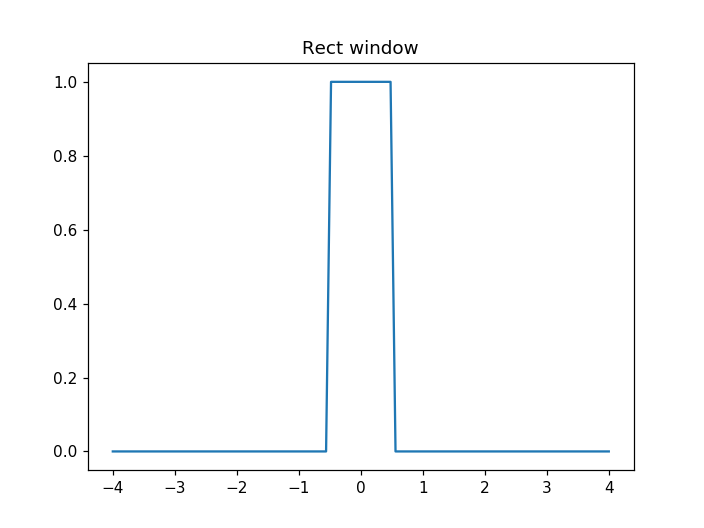

Text(0.5, 1.0, 'Rect window')

In [2]:
th_y = copy.deepcopy(th_x)
window_func.rect_window_torch(th_y)
plt.figure()
plt.plot(th_x.numpy(), th_y.numpy())
plt.title('Rect window')

<IPython.core.display.Javascript object>


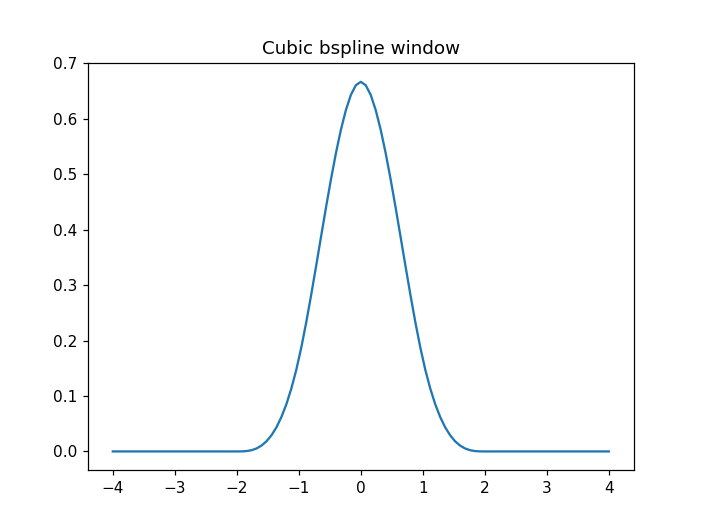

Text(0.5, 1.0, 'Cubic bspline window')

In [3]:
th_y = window_func.cubic_bspline_torch(th_x)
plt.figure()
plt.plot(th_x.numpy(), th_y.numpy())
plt.title('Cubic bspline window')

<IPython.core.display.Javascript object>


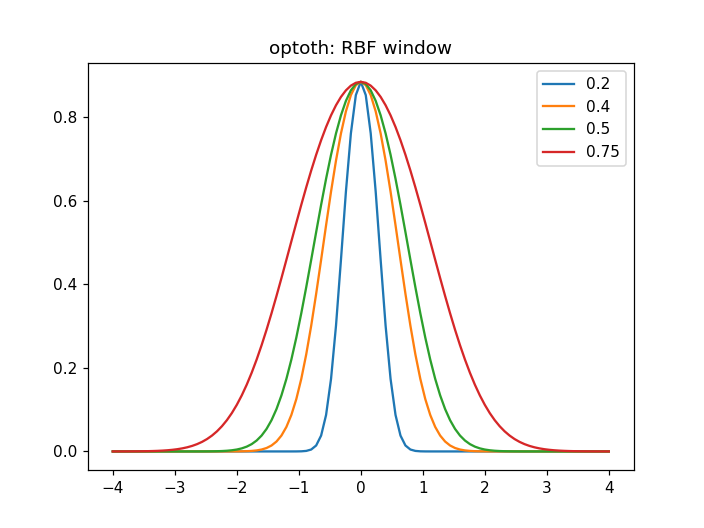

In [12]:
import optoth.activations

plt.figure()
vmax_list = [0.2, 0.4, 0.5, 0.75]
for vmax in vmax_list:
    rbf_op = optoth.activations.TrainableActivation(1, -vmax, vmax, 3, base_type='rbf', init='constant', init_scale=1.0).cuda()
    rbf_op.weight.requires_grad_(False)
    th_y = rbf_op(torch.unsqueeze(th_x.cuda(), 1))
    plt.plot(th_x.numpy(), th_y.detach().cpu().numpy())
plt.title('optoth: RBF window')
plt.legend(vmax_list)

<IPython.core.display.Javascript object>


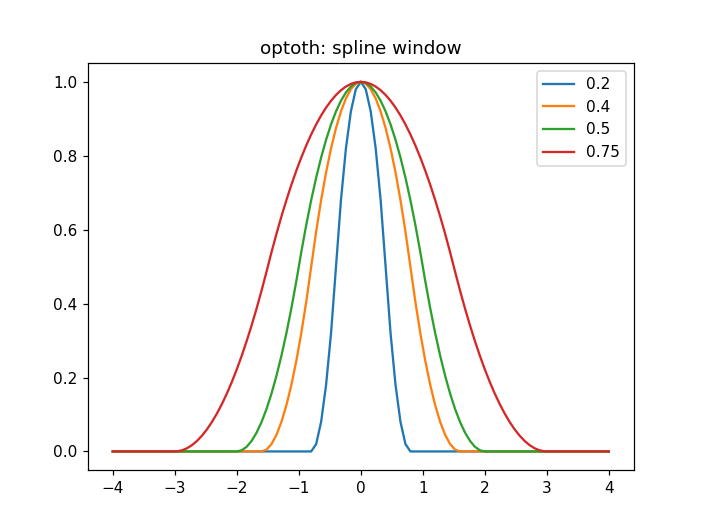

In [5]:
import optoth.activations

plt.figure()
vmax_list = [0.2, 0.4, 0.5, 0.75]
for vmax in vmax_list:
    spline_op = optoth.activations.TrainableActivation(1, -vmax, vmax, 2, base_type='spline', init='constant', init_scale=1.0).cuda()
    spline_op.weight.requires_grad_(False)
    th_y = spline_op(torch.unsqueeze(th_x.cuda(), 1))
    plt.plot(th_x.numpy(), th_y.detach().cpu().numpy())
plt.title('optoth: spline window')
plt.legend(vmax_list)